# Use-case: A mall owner has provided a dataset. Your goal is to identify any pattern that can help increase the business of the organization

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv('Mall_Customers.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
CustomerID                200 non-null int64
Genre                     200 non-null object
Age                       200 non-null int64
Annual Income (k$)        200 non-null int64
Spending Score (1-100)    200 non-null int64
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
data.head()

CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

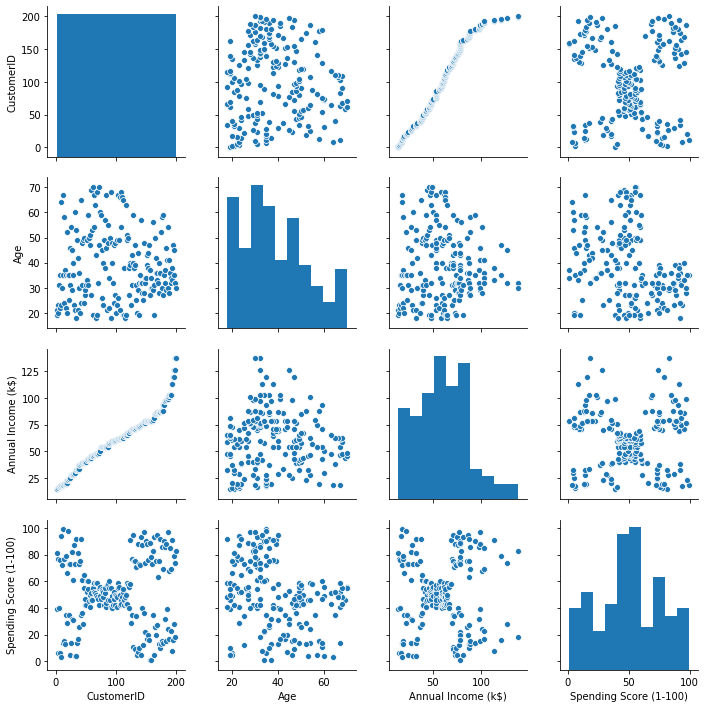

In [5]:
#Perform EDA
sns.pairplot(data)

In [ ]:
#Hypothesis based on Visual EDA
# 1. I can find relationship between AnnualIncome and SpendingScore (n_groups: 5)
# 2. I can find relationship between Age and Spending Score (n_groups: 2)

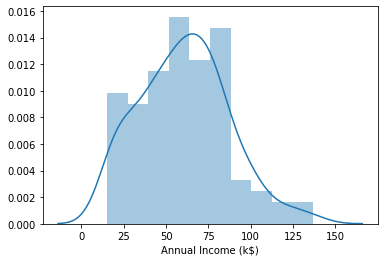

In [6]:
sns.distplot(data['Annual Income (k$)'])

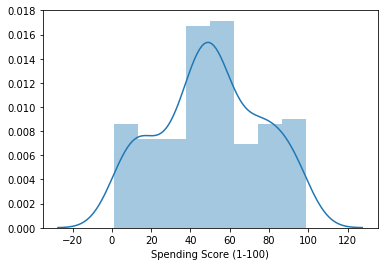

In [7]:
sns.distplot(data['Spending Score (1-100)'])

In [8]:
sns.distplot(data['Age'])

In [ ]:
# 1. I can find relationship between AnnualIncome and SpendingScore (n_groups: 5)

In [9]:
features = data.iloc[:,[3,4]].values


In [10]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=5)
model.fit(features)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [11]:
group = model.predict(features)

In [12]:
finalObservation = data.iloc[:,[3,4]]
finalObservation['group']=group
finalObservation.head()

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Annual Income (k$)  Spending Score (1-100)  group
0                  15                      39      4
1                  15                      81      3
2                  16                       6      4
3                  16                      77      3
4                  17                      40      4

In [17]:
sns.FacetGrid(finalObservation, hue='group', size=6) \
.map(plt.scatter,'Annual Income (k$)', 'Spending Score (1-100)') \
.add_legend()

In [24]:
# To verify the number of clusters you can use Elbow method using Kmeans++
# In kmeans, the metric that you use to check the quality of cluster group creation is 
# WCSS(Within Cluster Sum of Squares)

wcss=[]
for i in range(1,10):
    model = KMeans(n_clusters=i)
    model.fit(features)
    wcss.append(model.inertia_)

plt.plot(range(1,10),wcss)